<!-- <div>
    <img src="attachment:image.png" align="right" width="150">
</div> -->

# <font color='#5D6D7E '> <center >Forecasting - LUNA1</center>
    
### Master Degree Program in Data Science and Advanced Analytics    
    
### <font color='#5D6D7E '> Business Cases with Data Science Project: 
> #### Group AA

### <font color='#5D6D7E '> Done by:
> #### - Beatriz Martins Selidónio Gomes, m20210545
> #### - Catarina Inês Lopes Garcez, m20210547    
> #### - Diogo André Domingues Pires, m20201076  
> #### - Rodrigo Faísca Guedes, m20210587 

---

<div>
    
# Table of Content<a class="anchor"><a id='toc'></a>

### <font color='#5D6D7E '> Import and Data Integration  
- [<font color='#000000'>Import the needed Libraries</font>](#third-bullet)<br> 

### <font color='#5D6D7E '> Data Exploration and Understanding    
- [<font color='#000000'>Initial Analysis (EDA - Exploratory Data Analysis)</font>](#fifth-bullet)<br> 
- [<font color='#000000'>Variables Distribution</font>](#seventh-bullet)<br>    
    
### <font color='#5D6D7E '> Data Preparation      
- [<font color='#000000'>Data Transformation</font>](#eighth-bullet)<br>
    
### <font color='#5D6D7E '> Modelling    
- [<font color='#000000'>Building LSTM Model</font>](#twentysecond-bullet)<br>   
- [<font color='#000000'>Get Best Parameters for LSTM</font>](#twentythird-bullet)<br> 
- [<font color='#000000'>Run the LSTM Model and Get Predictions</font>](#twentyfourth-bullet)<br>   
- [<font color='#000000'>Recursive Predictions</font>](#twentysixth-bullet)<br>   
  

</div>

---

# Import and Data Integration


## <font color='#5D6D7E '>Import the needed Libraries</font> <a class="anchor" id="third-bullet"></a>
  [Back to TOC](#toc)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Exploration and Understanding

## <font color='#5D6D7E'>Initial Analysis (EDA - Exploratory Data Analysis) </font> <a class="anchor" id="fifth-bullet"></a>
  [Back to TOC](#toc)


In [2]:
df = pd.read_csv('../data/data_aux/df_LUNA1.csv')
df

,Date,LUNA1-USD_ADJCLOSE,LUNA1-USD_CLOSE,LUNA1-USD_HIGH,LUNA1-USD_LOW,LUNA1-USD_OPEN,LUNA1-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1821,2022-04-21,90.799156,90.799156,99.244980,90.334129,94.938416,2.322037e+09
1822,2022-04-22,93.682289,93.682289,96.709343,90.724594,90.784470,2.542109e+09
1823,2022-04-23,89.534752,89.534752,93.895706,89.199158,93.669579,1.251243e+09
1824,2022-04-24,90.560234,90.560234,92.183968,89.002373,89.436935,1.256729e+09


### Data Types

In [3]:
# Get to know the number of instances and Features, the DataTypes and if there are missing values in each Feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                1826 non-null   object 
 1   LUNA1-USD_ADJCLOSE  1005 non-null   float64
 2   LUNA1-USD_CLOSE     1005 non-null   float64
 3   LUNA1-USD_HIGH      1005 non-null   float64
 4   LUNA1-USD_LOW       1005 non-null   float64
 5   LUNA1-USD_OPEN      1005 non-null   float64
 6   LUNA1-USD_VOLUME    1005 non-null   float64
dtypes: float64(6), object(1)
memory usage: 100.0+ KB


### Missing Values

In [4]:
# Count the number of missing values for each Feature
df.isna().sum().to_frame().rename(columns={0: 'Count Missing Values'})

,Count Missing Values
Date,0
LUNA1-USD_ADJCLOSE,821
LUNA1-USD_CLOSE,821
LUNA1-USD_HIGH,821
LUNA1-USD_LOW,821
LUNA1-USD_OPEN,821
LUNA1-USD_VOLUME,821


### Descriptive Statistics

In [5]:
# Descriptive Statistics Table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LUNA1-USD_ADJCLOSE,1005.0,1.786033e+01,2.843780e+01,0.125335,3.027500e-01,1.064888e+00,2.515235e+01,1.164089e+02
LUNA1-USD_CLOSE,1005.0,1.786033e+01,2.843780e+01,0.125335,3.027500e-01,1.064888e+00,2.515235e+01,1.164089e+02
LUNA1-USD_HIGH,1005.0,1.876197e+01,2.972144e+01,0.137031,3.125700e-01,1.119922e+00,2.681221e+01,1.191846e+02
LUNA1-USD_LOW,1005.0,1.688641e+01,2.705967e+01,0.120116,2.910530e-01,1.050174e+00,2.088452e+01,1.141129e+02
LUNA1-USD_OPEN,1005.0,1.777017e+01,2.833693e+01,0.125335,3.027450e-01,1.064939e+00,2.197240e+01,1.164192e+02
LUNA1-USD_VOLUME,1005.0,5.790605e+08,1.001971e+09,170533.000000,3.319204e+06,1.962408e+07,7.414480e+08,6.147403e+09


In [6]:
# settings to display all columns
pd.set_option("display.max_columns", None)

# display the dataframe head
df.sample(n=10)

,Date,LUNA1-USD_ADJCLOSE,LUNA1-USD_CLOSE,LUNA1-USD_HIGH,LUNA1-USD_LOW,LUNA1-USD_OPEN,LUNA1-USD_VOLUME
737,2019-05-03,NaN,NaN,NaN,NaN,NaN,NaN
1409,2021-03-05,8.488712,8.488712,8.764044,6.996793,7.474930,5.398161e+08
336,2018-03-28,NaN,NaN,NaN,NaN,NaN,NaN
1463,2021-04-28,16.818577,16.818577,17.884422,16.463917,17.686108,4.913018e+08
1791,2022-03-22,93.002525,93.002525,96.304947,92.406837,95.921677,1.998402e+09
993,2020-01-14,0.195138,0.195138,0.209076,0.191769,0.201938,4.758246e+06
1590,2021-09-02,32.865040,32.865040,33.865612,31.394815,31.771261,9.820301e+08
1763,2022-02-22,54.784554,54.784554,55.252094,48.587330,50.157036,2.312185e+09
514,2018-09-22,NaN,NaN,NaN,NaN,NaN,NaN
1526,2021-06-30,6.522355,6.522355,6.661446,5.686498,6.016992,2.031811e+08


In [7]:
#CHECK ROWS THAT HAVE ANY MISSING VALUE IN ONE OF THE COLUMNS
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Date,LUNA1-USD_ADJCLOSE,LUNA1-USD_CLOSE,LUNA1-USD_HIGH,LUNA1-USD_LOW,LUNA1-USD_OPEN,LUNA1-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
816,2019-07-21,NaN,NaN,NaN,NaN,NaN,NaN
817,2019-07-22,NaN,NaN,NaN,NaN,NaN,NaN
818,2019-07-23,NaN,NaN,NaN,NaN,NaN,NaN
819,2019-07-24,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#FILTER OUT ROWS THAT ARE MISSING INFORMATION
df = df[~row_has_NaN]
df.reset_index(inplace=True, drop=True)
df

,Date,LUNA1-USD_ADJCLOSE,LUNA1-USD_CLOSE,LUNA1-USD_HIGH,LUNA1-USD_LOW,LUNA1-USD_OPEN,LUNA1-USD_VOLUME
0,2019-07-26,1.327436,1.327436,1.833167,1.261695,1.704222,1.208858e+07
1,2019-07-27,1.310566,1.310566,1.402898,1.221938,1.327436,6.033446e+06
2,2019-07-28,1.272989,1.272989,1.368595,1.236858,1.310566,1.643709e+06
3,2019-07-29,1.294661,1.294661,1.375941,1.175443,1.262270,3.966802e+06
4,2019-07-30,1.294193,1.294193,1.374333,1.266484,1.294435,1.820705e+06
...,...,...,...,...,...,...,...
1000,2022-04-21,90.799156,90.799156,99.244980,90.334129,94.938416,2.322037e+09
1001,2022-04-22,93.682289,93.682289,96.709343,90.724594,90.784470,2.542109e+09
1002,2022-04-23,89.534752,89.534752,93.895706,89.199158,93.669579,1.251243e+09
1003,2022-04-24,90.560234,90.560234,92.183968,89.002373,89.436935,1.256729e+09


# Data Preparation


## <font color='#5D6D7E'>Data Transformation</font> <a class="anchor" id="eighth-bullet"></a>
  [Back to TOC](#toc)

 __`Duplicates`__

In [9]:
# Checking if exist duplicated observations
print(f'\033[1m' + "Number of duplicates: " + '\033[0m', df.duplicated().sum())  

Number of duplicates:  0


 __`Convert Date to correct format`__

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df

,Date,LUNA1-USD_ADJCLOSE,LUNA1-USD_CLOSE,LUNA1-USD_HIGH,LUNA1-USD_LOW,LUNA1-USD_OPEN,LUNA1-USD_VOLUME
0,2019-07-26,1.327436,1.327436,1.833167,1.261695,1.704222,1.208858e+07
1,2019-07-27,1.310566,1.310566,1.402898,1.221938,1.327436,6.033446e+06
2,2019-07-28,1.272989,1.272989,1.368595,1.236858,1.310566,1.643709e+06
3,2019-07-29,1.294661,1.294661,1.375941,1.175443,1.262270,3.966802e+06
4,2019-07-30,1.294193,1.294193,1.374333,1.266484,1.294435,1.820705e+06
...,...,...,...,...,...,...,...
1000,2022-04-21,90.799156,90.799156,99.244980,90.334129,94.938416,2.322037e+09
1001,2022-04-22,93.682289,93.682289,96.709343,90.724594,90.784470,2.542109e+09
1002,2022-04-23,89.534752,89.534752,93.895706,89.199158,93.669579,1.251243e+09
1003,2022-04-24,90.560234,90.560234,92.183968,89.002373,89.436935,1.256729e+09


 __`Get percentual difference between open and close values and low and high values`__

In [11]:
df['pctDiff_CloseOpen'] = abs((df[df.columns[2]]-df[df.columns[5]])/df[df.columns[2]])*100
df['pctDiff_HighLow'] = abs((df[df.columns[3]]-df[df.columns[4]])/df[df.columns[4]])*100
df.head()

,Date,LUNA1-USD_ADJCLOSE,LUNA1-USD_CLOSE,LUNA1-USD_HIGH,LUNA1-USD_LOW,LUNA1-USD_OPEN,LUNA1-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
0,2019-07-26,1.327436,1.327436,1.833167,1.261695,1.704222,12088575.0,28.384495,45.293983
1,2019-07-27,1.310566,1.310566,1.402898,1.221938,1.327436,6033446.0,1.287232,14.809257
2,2019-07-28,1.272989,1.272989,1.368595,1.236858,1.310566,1643709.0,2.951865,10.650939
3,2019-07-29,1.294661,1.294661,1.375941,1.175443,1.262270,3966802.0,2.501896,17.057227
4,2019-07-30,1.294193,1.294193,1.374333,1.266484,1.294435,1820705.0,0.018699,8.515623


In [12]:
def plot_coinValue(df):
    
    #Get coin name
    coin_name = df.columns[2].split('-')[0]
    
    #Get date and coin value
    x = df['Date']
    y = df[df.columns[2]] # ADA-USD_CLOSE
    
    #Get the volume of trades
    v = df[df.columns[-3]]/1e9
    
    #Get percentual diferences
    y2 = df[df.columns[-1]] # pctDiff_HighLow
    y1= df[df.columns[-2]]  # pctDiff_CloseOpen
    
    fig, axs = plt.subplots(3, 1, figsize=(12,14))
    
    axs[0].plot(x, y)
    axs[2].plot(x, v)
    
    # plotting the line 1 points 
    axs[1].plot(x, y1, label = "Close/Open")

    # plotting the line 2 points 
    axs[1].plot(x, y2, label = "High/Low")
    axs[1].legend()
    
    axs[0].title.set_text('Time Evolution of '+ coin_name)
    axs[0].set(xlabel="", ylabel="Close Value in USD$")
    
    axs[2].title.set_text('Volume of trades of '+ coin_name)
    axs[2].set(xlabel="", ylabel="Total number of trades in billions")
    
    
    axs[1].title.set_text('Daily Market percentual differences of '+ coin_name)
    axs[1].set(xlabel="", ylabel="Percentage (%)")
    
    plt.savefig('../analysis/'+coin_name +'_stats'+'.png')
    
    return coin_name

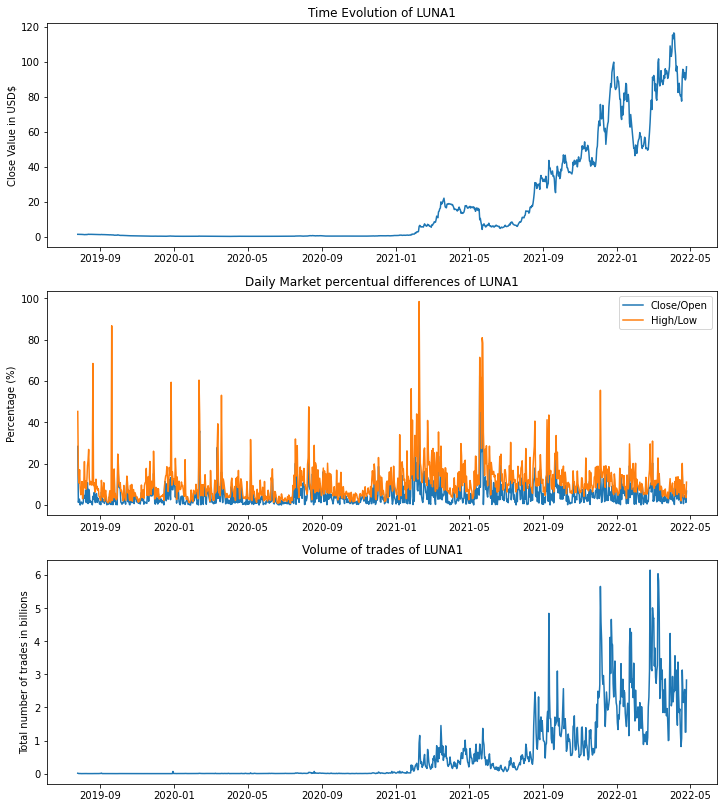

In [13]:
coin_name = plot_coinValue(df)

In [14]:
#FILTER DATASET
df = df.loc[df['Date']>= '2021-10-01']
df

,Date,LUNA1-USD_ADJCLOSE,LUNA1-USD_CLOSE,LUNA1-USD_HIGH,LUNA1-USD_LOW,LUNA1-USD_OPEN,LUNA1-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
798,2021-10-01,37.737476,37.737476,39.975315,36.558472,38.830688,1.270901e+09,2.896887,9.346242
799,2021-10-02,41.476894,41.476894,43.512802,37.114410,37.749657,1.495129e+09,8.986299,17.239643
800,2021-10-03,42.742489,42.742489,46.088326,41.519005,41.519005,2.042995e+09,2.862454,11.005371
801,2021-10-04,46.723358,46.723358,49.449837,41.610016,42.740257,2.567464e+09,8.524860,18.841187
802,2021-10-05,44.708672,44.708672,47.179146,43.645386,46.788422,1.359206e+09,4.651782,8.096526
...,...,...,...,...,...,...,...,...,...
1000,2022-04-21,90.799156,90.799156,99.244980,90.334129,94.938416,2.322037e+09,4.558698,9.864323
1001,2022-04-22,93.682289,93.682289,96.709343,90.724594,90.784470,2.542109e+09,3.093242,6.596611
1002,2022-04-23,89.534752,89.534752,93.895706,89.199158,93.669579,1.251243e+09,4.618125,5.265239
1003,2022-04-24,90.560234,90.560234,92.183968,89.002373,89.436935,1.256729e+09,1.240388,3.574730


# Modelling


## <font color='#5D6D7E'>Building LSTM Model</font> <a class="anchor" id="twentysecond-bullet"></a>
  [Back to TOC](#toc)

## Strategy

Create a DF (windowed_df) where the middle columns will correspond to the close values of X days before the target date and the final column will correspond to the close value of the target date. Use these values for prediction and play with the value of X

In [15]:
def get_windowed_df(X, df):
    start_Date = df['Date'] + pd.Timedelta(days=X)
    
    perm = np.zeros((1,X+1))
    
    #Get labels for DataFrame
    j=1
    labels=[]
    
    while j <= X:
        label = 'closeValue_' + str(j) + 'daysBefore'
        labels.append(label)
        
        j+=1
 
    labels.append('closeValue')
    
    for i in range(X,df.shape[0]):
        temp = np.zeros((1,X+1))
        
        #Date for i-th day
        #temp[0,0] = df.iloc[i]['Date']
        
        #Close values for k days before
        for k in range(X):           
            temp[0,k] = df.iloc[i-k-1,2]
            
        #Close value for i-th date
        temp[0,-1] = df.iloc[i,2]
        

        #Add values to the permanent frame
        perm = np.vstack((perm,temp))
        
        #Get the array in dataframe form
        windowed_df = pd.DataFrame(perm[1:,:], columns = labels)
        
    return windowed_df

In [16]:
#Get the dataframe and append the dates
windowed_df = get_windowed_df(4, df)
windowed_df['Date'] = df.iloc[4:]['Date'].reset_index(drop=True)
windowed_df

,closeValue_1daysBefore,closeValue_2daysBefore,closeValue_3daysBefore,closeValue_4daysBefore,closeValue,Date
0,46.723358,42.742489,41.476894,37.737476,44.708672,2021-10-05
1,44.708672,46.723358,42.742489,41.476894,41.948692,2021-10-06
2,41.948692,44.708672,46.723358,42.742489,46.542950,2021-10-07
3,46.542950,41.948692,44.708672,46.723358,43.286179,2021-10-08
4,43.286179,46.542950,41.948692,44.708672,42.473362,2021-10-09
...,...,...,...,...,...,...
198,94.955681,95.615509,91.074356,77.427139,90.799156,2022-04-21
199,90.799156,94.955681,95.615509,91.074356,93.682289,2022-04-22
200,93.682289,90.799156,94.955681,95.615509,89.534752,2022-04-23
201,89.534752,93.682289,90.799156,94.955681,90.560234,2022-04-24


In [17]:
#Get the X,y and dates into a numpy array to apply on a model

def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, -1]

    middle_matrix = df_as_np[:, 0:-2]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    Y = df_as_np[:, -2]

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((203,), (203, 4, 1), (203,))

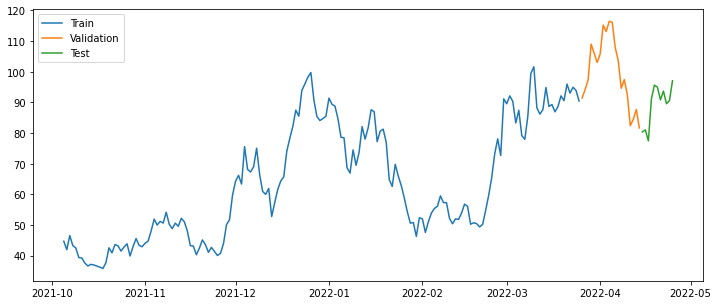

In [18]:
#Partition for train, validation and test

q_80 = int(len(dates) * .85)
q_90 = int(len(dates) * .95)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

fig,axs = plt.subplots(1, 1, figsize=(12,5))

#Plot the partitions
axs.plot(dates_train, y_train)
axs.plot(dates_val, y_val)
axs.plot(dates_test, y_test)

axs.legend(['Train', 'Validation', 'Test'])

fig.savefig('../analysis/'+coin_name +'_partition'+'.png')

## <font color='#5D6D7E'>Get Best Parameters for LSTM</font> <a class="anchor" id="twentythird-bullet"></a>
  [Back to TOC](#toc)

In [19]:
#!pip install tensorflow

In [20]:
#import os
#os.environ['PYTHONHASHSEED']= '0'
#import numpy as np
#np.random.seed(1)
#import random as rn
#rn.seed(1)
#import tensorflow as tf
#tf.random.set_seed(1)
#
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras import layers
#from sklearn.metrics import mean_squared_error
#
## Function to create LSTM model and compute the MSE value for the given parameters
#def check_model(X_train, y_train, X_val, y_val, X_test, y_test, learning_rate,epoch,batch):
#    
#    # create model
#    model = Sequential([layers.Input((4, 1)),
#                        layers.LSTM(64),
#                        layers.Dense(32, activation='relu'),
#                        layers.Dense(32, activation='relu'),
#                        layers.Dense(1)])
#    # Compile model
#    model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate), metrics=['mean_absolute_error'])
#    
#    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epoch, shuffle=False, batch_size=batch, verbose=2)
#    
#    test_predictions = model.predict(X_test).flatten()
#    
#    LSTM_mse = mean_squared_error(y_test, test_predictions)
#    
#    return LSTM_mse
#
##Function that iterates the different parameters and gets the ones corresponding to the lowest MSE score.
#def search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test):
#    
#    best_score = float('inf')
#    
#    for b in batch_size:
#        for e in epochs:
#            for l in learn_rate:
#                print('Batch Size: ' + str(b))
#                print('Number of Epochs: ' + str(e))
#                print('Value of Learning Rate: ' + str(l))
#                try:
#                    mse = check_model(X_train, y_train, X_val, y_val, X_test, y_test,l,e,b)
#                    print('MSE=%.3f' % (mse))
#                    if mse < best_score:
#                        best_score = mse
#                        top_params = [b, e, l]
#                except:
#                    continue
#                    
#    print('Best MSE=%.3f' % (best_score))
#    print('Optimal Batch Size: ' + str(top_params[0]))
#    print('Optimal Number of Epochs: ' + str(top_params[1]))
#    print('Optimal Value of Learning Rate: ' + str(top_params[2]))
#                        
#
## define parameters
#batch_size = [10, 100, 1000]
#epochs = [50, 100]
#learn_rate = np.linspace(0.001,0.1, num=10)
#
#warnings.filterwarnings("ignore")
#search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test)

## <font color='#5D6D7E'>Run the LSTM Model and Get Predictions</font> <a class="anchor" id="twentyfourth-bullet"></a>
  [Back to TOC](#toc)

In [21]:
#BEST SOLUTION OF THE MODEL

# MSE=84.985
# Batch Size: 10
# Number of Epochs: 50
# Value of Learning Rate: 0.001

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error

model = Sequential([layers.Input((4, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, shuffle=False, batch_size=10, verbose=2)

Epoch 1/50
18/18 - 1s - loss: 4297.3159 - mean_absolute_error: 62.8933 - val_loss: 9759.1240 - val_mean_absolute_error: 98.1753 - 1s/epoch - 81ms/step
Epoch 2/50
18/18 - 0s - loss: 4006.7432 - mean_absolute_error: 60.5806 - val_loss: 9201.9189 - val_mean_absolute_error: 95.2953 - 49ms/epoch - 3ms/step
Epoch 3/50
18/18 - 0s - loss: 3524.3542 - mean_absolute_error: 56.5439 - val_loss: 8196.9160 - val_mean_absolute_error: 89.8637 - 47ms/epoch - 3ms/step
Epoch 4/50
18/18 - 0s - loss: 2643.3633 - mean_absolute_error: 48.3425 - val_loss: 6367.7759 - val_mean_absolute_error: 79.0303 - 48ms/epoch - 3ms/step
Epoch 5/50
18/18 - 0s - loss: 1438.6287 - mean_absolute_error: 34.0610 - val_loss: 3845.9312 - val_mean_absolute_error: 61.0249 - 47ms/epoch - 3ms/step
Epoch 6/50
18/18 - 0s - loss: 521.1256 - mean_absolute_error: 16.8903 - val_loss: 1937.9017 - val_mean_absolute_error: 42.6082 - 48ms/epoch - 3ms/step
Epoch 7/50
18/18 - 0s - loss: 320.3809 - mean_absolute_error: 15.8469 - val_loss: 1252.618

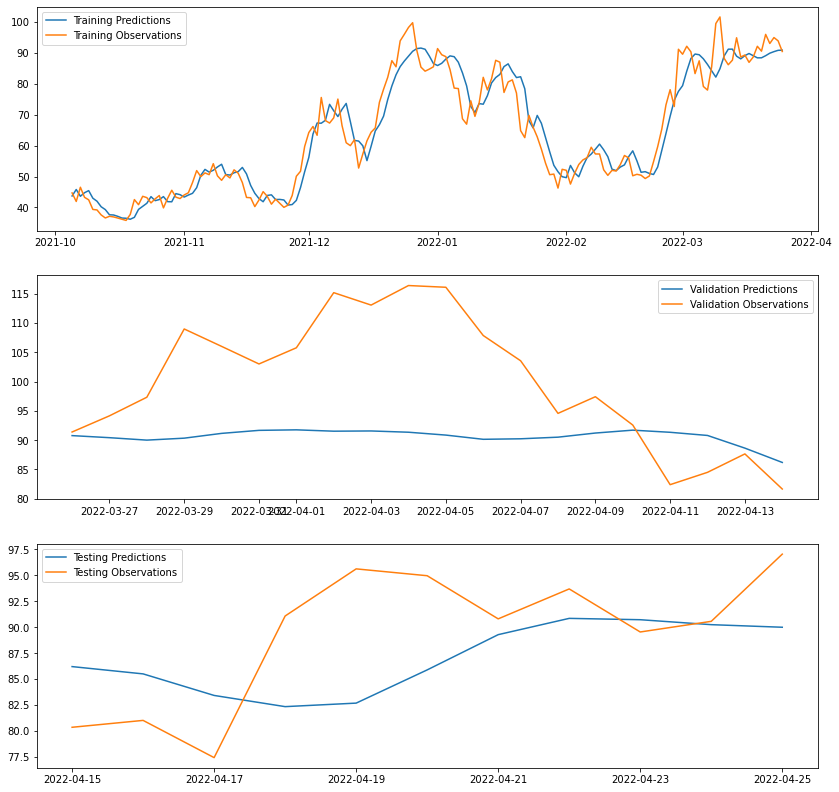

In [22]:
#PREDICT THE VALUES USING THE MODEL
train_predictions = model.predict(X_train).flatten()
val_predictions = model.predict(X_val).flatten()
test_predictions = model.predict(X_test).flatten()


fig,axs = plt.subplots(3, 1, figsize=(14,14))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].legend(['Training Predictions', 'Training Observations'])

axs[1].plot(dates_val, val_predictions)
axs[1].plot(dates_val, y_val)
axs[1].legend(['Validation Predictions', 'Validation Observations'])

axs[2].plot(dates_test, test_predictions)
axs[2].plot(dates_test, y_test)
axs[2].legend(['Testing Predictions', 'Testing Observations'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_modelPredictions'+'.png')

## <font color='#5D6D7E'>Recursive Predictions</font> <a class="anchor" id="twentysixth-bullet"></a>
  [Back to TOC](#toc)

In [23]:
from copy import deepcopy

#Get prediction for future dates recursively based on the previous existing information. Then update the window of days upon
#which the predictions are made

recursive_predictions = []
recursive_dates = np.concatenate([dates_test])

extra_dates = np.array(['2022-05-09', '2022-05-10', '2022-05-11'])
recursive_dates = np.append(recursive_dates,extra_dates)

last_window = deepcopy(X_train[-1])

for target_date in recursive_dates:
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window = np.insert(last_window,0,next_prediction)[:-1]
    

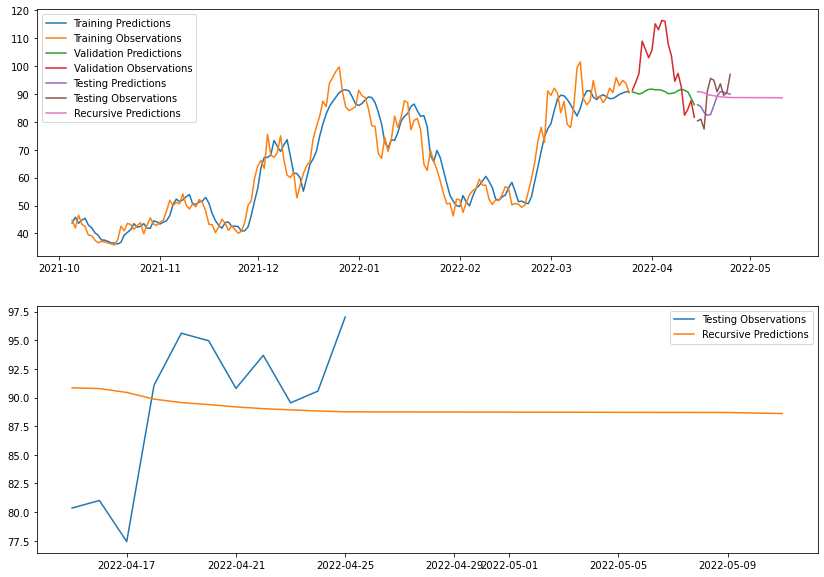

In [24]:
fig,axs = plt.subplots(2, 1, figsize=(14,10))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].plot(dates_val, val_predictions)
axs[0].plot(dates_val, y_val)
axs[0].plot(dates_test, test_predictions)
axs[0].plot(dates_test, y_test)
axs[0].plot(recursive_dates, recursive_predictions)
axs[0].legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])

axs[1].plot(dates_test, y_test)
axs[1].plot(recursive_dates, recursive_predictions)
axs[1].legend(['Testing Observations',
              'Recursive Predictions'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_recursivePredictions'+'.png')

In [25]:
may_10_prediction = coin_name +'-USD',recursive_predictions[-2][0]
may_10_prediction

('LUNA1-USD', 88.64441)